<a href="https://colab.research.google.com/github/jgonza44/Titanic-Prediction/blob/master/Titanic_extra_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model is an improvment on the tutorial by Alexis Cook found [here](https://www.kaggle.com/alexisbcook/titanic-tutorial)

In [ ]:
# Initial Python environment setup...
import numpy as np 
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns 
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline 
import matplotlib.pyplot as plt
import os  
print(os.listdir('/content/drive/My Drive/data')) 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['test.csv', 'train.csv', 'submit.csv', 'weather.csv', 'gender_submission.csv', 'train_titanic.csv', 'test_titanic.csv', 'submission.csv', 'titanic_submission.csv']


In [ ]:
train_data = pd.read_csv("/content/drive/My Drive/data/train_titanic.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('Too much Cabin information is missing (location on ship) for it to be a useful feature with', train_data['Cabin'].isnull().sum(), 'null cells') 


Too much Cabin information is missing (location on ship) for it to be a useful feature with 687 null cells


Check for null Fare values


In [ ]:
print('There are', train_data['Fare'].isnull().sum(), 'null fare cells' )

There are 0 null fare cells


Check for null age values

In [ ]:
train_data['Age'].isnull().sum()

177

Removing rows with null age values gets rid of way too many rows so i'll comment this code out


In [ ]:
# train_data = train_data.dropna(how = 'any', axis = 'rows') 

Instead, I'll change null age values for the average age in each class group.

Get an average age from the training data


In [ ]:
firstclass = train_data[train_data.Pclass == 1] # Average age in first Class
secondclass = train_data[train_data.Pclass == 2] # Average age in second Class
thirdclass = train_data[train_data.Pclass == 3] # Average age in third Class
 
def av_age_fill(df):
  for ind,row in df.iterrows():
    if pd.isnull(row.Age) :
      if row.Pclass == 1:
        df.loc[ind,'Age'] = firstclass.Age.mean()
      elif row.Pclass == 2:
        df.loc[ind,'Age'] = secondclass.Age.mean()
      elif row.Pclass == 3:
        df.loc[ind,'Age'] = thirdclass.Age.mean()

av_age_fill(train_data)
# train_data.head(n=20)

In [ ]:
train_data['Age'].isnull().sum()

0

Get an average fare from the training data

In [ ]:
def av_fare_fill(df):
  for ind,row in df.iterrows():
    if pd.isnull(row.Fare) :
      if row.Pclass == 1:
        df.loc[ind,'Fare'] = firstclass.Fare.mean()
      elif row.Pclass == 2:
        df.loc[ind,'Fare'] = secondclass.Fare.mean()
      elif row.Pclass == 3:
        df.loc[ind,'Fare'] = thirdclass.Fare.mean()
av_fare_fill(train_data) # fill if needed

In [ ]:
train_data['Fare'].isnull().sum()

0

In [ ]:
train_data['Survived'].isnull().sum()

0

In [ ]:
male = train_data[train_data['Sex'] == 'male']
female = train_data[train_data['Sex'] == 'female']

print('THE AVERAGE AGE FOR FEMALES IS:', female.Age.mean(), '\n', "\nTHE AVERAGE AGE FOR MALES IS:", male.Age.mean())

THE AVERAGE AGE FOR FEMALES IS: 27.85274603830112 
 
THE AVERAGE AGE FOR MALES IS: 30.07658437106733


Lets create a Frame for just the females and explore the data.

In [ ]:
women_df = pd.DataFrame(train_data[train_data.Sex == 'female'])

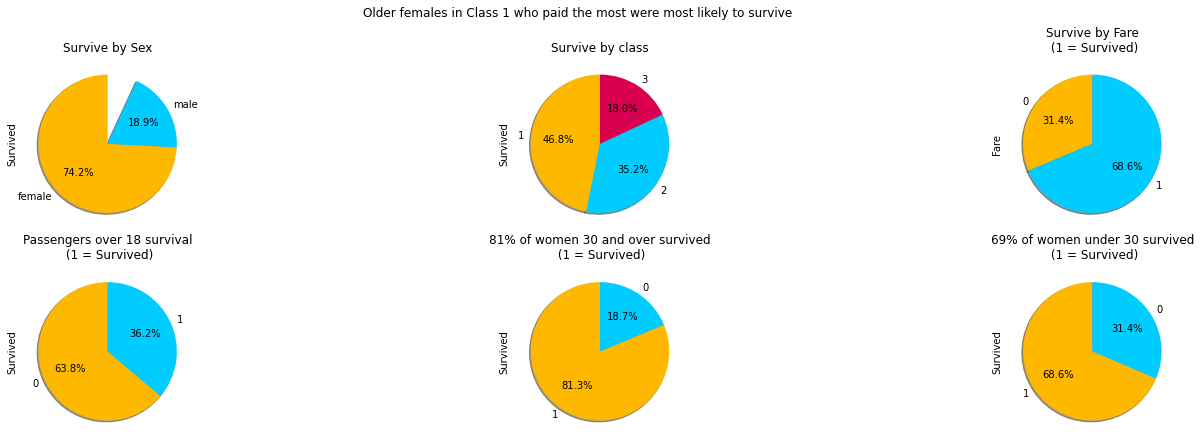

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(25,7))

colors_list = ['#ffb800','#00ccff', '#d9004f','#0048BA', '#7009E4', '#f0f0ff', '#efdecd']

train_data.groupby('Sex')['Survived'].mean().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90, colors=colors_list, ax=ax[0,0]);
ax[0,0].set_title('Survive by Sex');
train_data.groupby('Pclass')['Survived'].mean().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90, colors=colors_list, ax=ax[0,1]);
ax[0,1].set_title('Survive by class');
train_data[train_data.Age > 18]['Survived'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90, colors=colors_list, ax=ax[1,0])
ax[1,0].set_title('Passengers over 18 survival\n (1 = Survived)')

train_data.groupby('Survived')['Fare'].mean().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90, colors=colors_list, ax=ax[0,2]);
ax[0,2].set_title('Survive by Fare\n (1 = Survived)');

women_df[women_df.Age >= 28]['Survived'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90, colors=colors_list, ax=ax[1,1])
women_df[women_df.Age < 28]['Survived'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90, colors=colors_list, ax=ax[1,2])
ax[1,1].set_title('81% of women 30 and over survived\n (1 = Survived)')
ax[1,2].set_title('69% of women under 30 survived\n (1 = Survived)')

plt.suptitle('Older females in Class 1 who paid the most were most likely to survive')
plt.show()

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women * 100)

% of women who survived: 74.20382165605095


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men * 100)

% of men who survived: 18.890814558058924


In [ ]:
test_data = pd.read_csv("/content/drive/My Drive/data/test_titanic.csv")

Reuse age fill function for test data.

In [ ]:
# test_data.reset_index(drop=True)
av_age_fill(test_data)

Reuse fare fill function for test data.

In [ ]:
av_fare_fill(test_data)
# test_data['Fare'] = test_data['Fare'].fillna(value=average_fare)

In [ ]:
test_data['Fare'].isnull().sum()

0

## Tests run in tutorial ##

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]
actual = y.head(n=len(test_data))

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
 
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/content/drive/My Drive/data/titanic_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
print(model.score(X,y)) # I can do better

0.8159371492704826


## Test run after I made improvements ##

It looks like the coorelation between fare and survival as well as age and survival are stronger than siblings and parents so I'll change the features. Also, since this sample is so small, I don' have to limit the max depth. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]
actual = y.head(n=len(test_data))


features = ["Pclass", "Sex", "Fare", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=200, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('/content/drive/My Drive/data/titanic_submission.csv', index=False)
# print("Your submission was successfully saved!")

In [ ]:
print('As expected from the features, my model can correctly predict whether a passenger will survive', str(model.score(X,y).round(4) * 100)+'%', 'of the time.') 

As expected from the features, my model can correctly predict whether a passenger will survive 97.98% of the time.


These things seem to always hold true, Money, Age, and Class are good indicators for survival.